# **TikTok Project**
**Course 5 - Regression Analysis: Simplify complex data relationships**

You are a data professional at TikTok. The data team is working towards building a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and hypothesis testing.

The TikTok team has reviewed the results of the hypothesis testing. TikTok’s Operations Lead, Maika Abadi, is interested in how different variables are associated with whether a user is verified. Earlier, the data team observed that if a user is verified, they are much more likely to post opinions. Now, the data team has decided to explore how to predict verified status to help them understand how video characteristics relate to verified users. Therefore, you have been asked to conduct a logistic regression using verified status as the outcome variable. The results may be used to inform the final model related to predicting whether a video is a claim vs an opinion.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 5 End-of-course project: Regression modeling**


In this activity, you will build a logistic regression model in Python. As you have learned, logistic regression helps you estimate the probability of an outcome. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed.

<br/>

**The purpose** of this project is to demostrate knowledge of EDA and regression models.

**The goal** is to build a logistic regression model and evaluate the model.
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a logistic regression model?

**Part 2:** Model Building and Evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

Follow the instructions and answer the question below to complete the activity. Then, you will complete an executive summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.


# **Build a regression model**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**

Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**
Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

### **Task 1. Imports and loading**
Import the data and packages that you've learned are needed for building regression models.

In [1]:
# Import packages for data manipulation
import numpy as np
import pandas as pd

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

# Import packages for data modeling
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics


Load the TikTok dataset.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe
file_name = "tiktok_dataset.csv"
data = pd.read_csv(file_name)

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

In this stage, consider the following question where applicable to complete your code response:

* What are some purposes of EDA before constructing a logistic regression model?


Exploratory Data Analysis (EDA) is a crucial step before building a logistic regression model in Python. It helps you understand your data better, identify potential issues, and make informed decisions about model construction. In feature engineering, we create new features or transform existing ones to improve model performance, explore interactions between variables that might be predictive, and identify the most important features for your model. In model assumption checking, we verify if the relationship between the independent variables and the log odds of the dependent variable is linear, check for correlations between independent variables that might affect model stability, and ensure that observations are independent of each other. Thus, by conducting a thorough EDA, you can make informed decisions about feature engineering, model selection, and hyperparameter tuning to build a more accurate and reliable logistic regression model.

### **Task 2a. Explore data with EDA**

Analyze the data and check for and handle missing values and duplicates.

Inspect the first five rows of the dataframe.

In [3]:
# Display first few rows
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Get the number of rows and columns in the dataset.

In [4]:
# Get number of rows and columns
data.shape


(19382, 12)

Get the data types of the columns.

In [5]:
# Get data types of columns
data.dtypes


#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

Get basic information about the dataset.

In [6]:
# Get basic information
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate basic descriptive statistics about the dataset.

In [7]:
# Generate basic descriptive stats
data.describe()


,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Check for and handle missing values.

In [8]:
# Check for missing values
data.isnull().sum()


#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [9]:
# Drop useless cols
modified_data = data.drop(['#', 'video_id'], axis=1)

In [10]:
# Drop rows with missing values
data_subset = modified_data.dropna(axis=0).reset_index(drop = True)


In [11]:
# Display first few rows after handling missing values
data_subset.head()


,claim_status,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,claim,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,claim,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,claim,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,claim,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,claim,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Check for and handle duplicates.

In [12]:
# Check for duplicates
data_subset.duplicated().sum()

0

Check for and handle outliers.

In [13]:
def readable_numbers(x):
    """takes a number and formats it to make it more readable"""
    """
    version-01:
    s = '{:1.2f}'.format(x)
    version-02:
    """
    if x >= 1e6:
        s = '{:1.1f}M'.format(x*1e-6)
    elif x < 1e6 and x >= 1e3:
        s = '{:1.0f}K'.format(x*1e-3)
    else:
        s = '{:1.2f}'.format(x)
    return s

/tmp/ipykernel_110/2850401127.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  box.set_xticklabels(np.array([readable_numbers(x) for x in g.get_xticks()]))


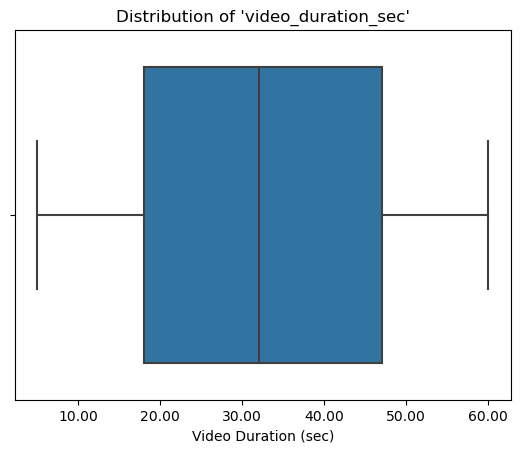

In [14]:
# Create a boxplot to visualize distribution of `video_duration_sec`
box = sns.boxplot(x=data_subset['video_duration_sec'])
g = plt.gca()
box.set_xticklabels(np.array([readable_numbers(x) for x in g.get_xticks()]))
plt.xlabel('Video Duration (sec)')
plt.title("Distribution of 'video_duration_sec'");


/tmp/ipykernel_110/4146799937.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  box.set_xticklabels(np.array([readable_numbers(x) for x in g.get_xticks()]))


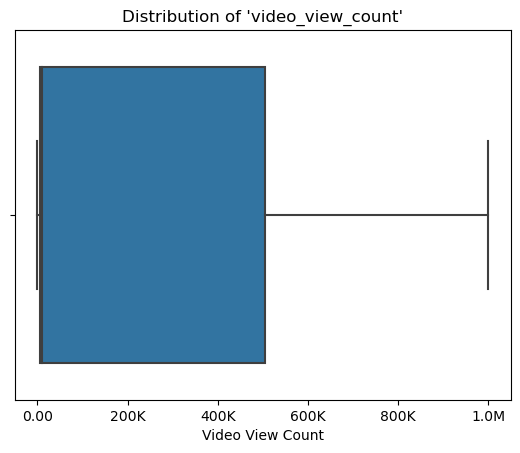

In [15]:
# Create a boxplot to visualize distribution of `video_view_count`
box = sns.boxplot(x=data_subset['video_view_count'])
g = plt.gca()
box.set_xticklabels(np.array([readable_numbers(x) for x in g.get_xticks()]))
plt.xlabel('Video View Count')
plt.title("Distribution of 'video_view_count'");


/tmp/ipykernel_110/2148590260.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  box.set_xticklabels(np.array([readable_numbers(x) for x in g.get_xticks()]))


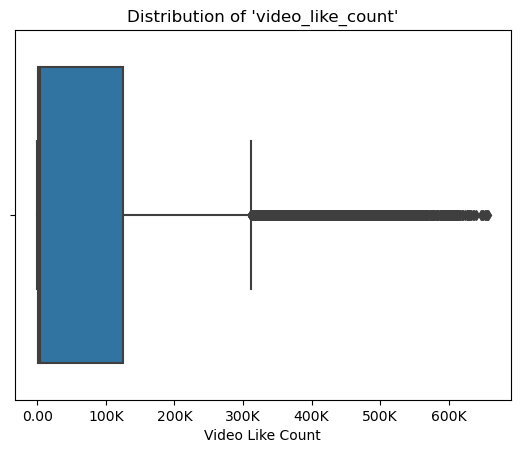

In [16]:
# Create a boxplot to visualize distribution of `video_like_count`
box = sns.boxplot(x=data_subset['video_like_count'])
g = plt.gca()
box.set_xticklabels(np.array([readable_numbers(x) for x in g.get_xticks()]))
plt.xlabel('Video Like Count')
plt.title("Distribution of 'video_like_count'");


/tmp/ipykernel_110/315453152.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  box.set_xticklabels(np.array([readable_numbers(x) for x in g.get_xticks()]))


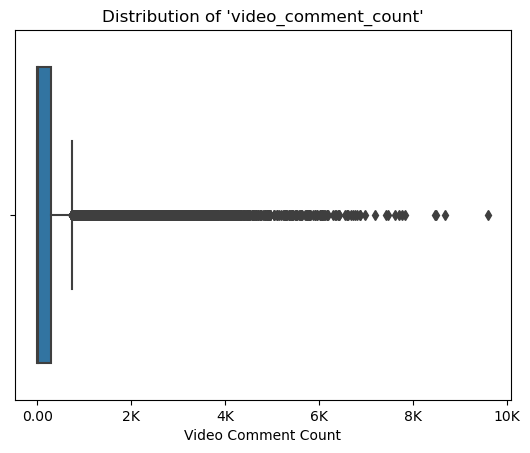

In [17]:
# Create a boxplot to visualize distribution of `video_comment_count`
box = sns.boxplot(x=data_subset['video_comment_count'])
g = plt.gca()
box.set_xticklabels(np.array([readable_numbers(x) for x in g.get_xticks()]))
plt.xlabel('Video Comment Count')
plt.title("Distribution of 'video_comment_count'");


In [18]:
def check_for_outliers(column_names: []):
    for col in column_names:
        # Calculate the IQR of the column
        q1 = data_subset[col].quantile(0.25)
        q3 = data_subset[col].quantile(0.75)
        IQR = q3 - q1
        # Calculate the median of the column
        median_of_the_column = data_subset[col].median()
        # Calculate the outlier threshold (median + 1.5 * IQR)
        outlier_threshold = median_of_the_column + (1.5 * IQR)
        # Calculate the numer of videos with a count in that column that exceeds the outlier threshold
        outlier_count = (data_subset[col] > outlier_threshold).sum()
        # Print "Number of outliers, {column name}: {outlier count}"
        print(f"Number of outliers, {col}: {outlier_count}")

In [19]:
def handle_outliers(column_names: []):
    """
    vesion-01:
    for col in column_names:
        # Set Thresholds: Define the lower and upper percentiles for capping. 
        lower_percentile = 0.25
        upper_percentile = 0.75

        # Calculate Threshold Values
        lower_threshold = data_subset[col].quantile(lower_percentile)
        upper_threshold = data_subset[col].quantile(upper_percentile)

        # Cap the Outliers: Replace values below the lower threshold with the lower threshold and values above the upper threshold with the upper threshold.
        data_subset.loc[data_subset[col] > lower_threshold, col] = lower_threshold
        data_subset.loc[data_subset[col] > upper_threshold, col] = upper_threshold    

    
    version-02:
    for col in column_names:
        # Calculate the IQR of the column
        q1 = data_subset[col].quantile(0.25)
        q3 = data_subset[col].quantile(0.75)
        IQR = q3 - q1
        # Calculate the outlier threshold (median + 1.5 * IQR)
        outlier_threshold = q3 + (1.5 * IQR)
        data_subset.loc[data_subset[col] > outlier_threshold, col] = outlier_threshold
    
    """
    # version-03:
    for col in column_names:
        # Calculate the IQR of the column
        q1 = data_subset[col].quantile(0.25)
        q3 = data_subset[col].quantile(0.75)
        IQR = q3 - q1
        # Calculate the median of the column
        median_of_the_column = data_subset[col].median()
        # Calculate the outlier threshold (median + 1.5 * IQR)
        outlier_threshold = median_of_the_column + (1.5 * IQR)
        data_subset.loc[data_subset[col] > outlier_threshold, col] = outlier_threshold
    

In [20]:
# Check for outliers for video_like_count and video_comment_count

column_names = ['video_like_count', 'video_comment_count']

check_for_outliers(column_names)


Number of outliers, video_like_count: 3468
Number of outliers, video_comment_count: 3882


In [21]:
# Handle outliers for video_like_count and video_comment_count
"""
Given the large number of outliers (3468 and 3882), deletion might not be ideal.
Transformation or robust statistical methods could be more suitable.
Choosing a Handling Strategy such as:
Capping/Trimming (replacing outliers with a maximum or minimum value)
or Winsorization (replacing outliers with the nearest non-outlier value).
"""
column_names = ['video_like_count', 'video_comment_count']

handle_outliers(column_names)

/tmp/ipykernel_110/869443751.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  box.set_xticklabels(np.array([readable_numbers(x) for x in g.get_xticks()]))
/tmp/ipykernel_110/869443751.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  box.set_xticklabels(np.array([readable_numbers(x) for x in g.get_xticks()]))


[]

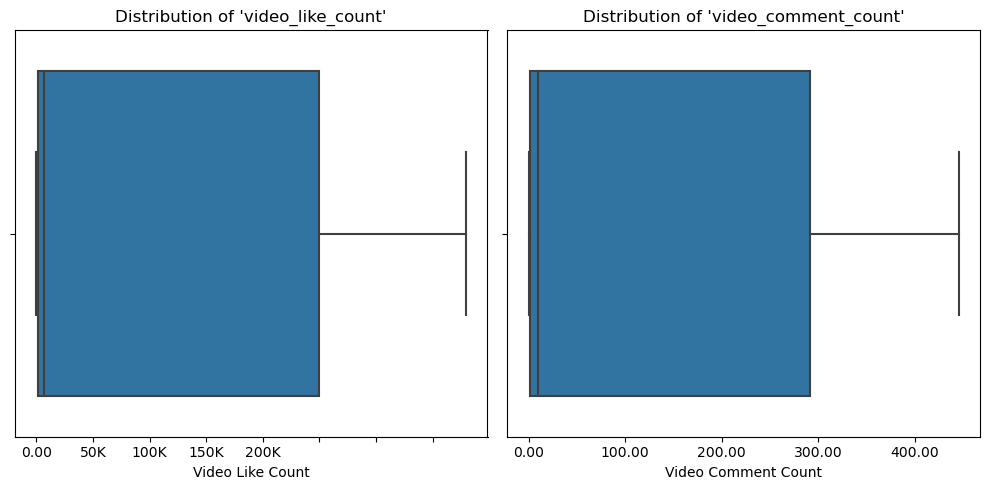

In [22]:
# Set the size of the plot.
plt.figure(figsize = (10, 5))


# Create your first plot (e.g., a boxplot)
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
# Create a boxplot to visualize distribution of `video_like_count`
box = sns.boxplot(x=data_subset['video_like_count'])
g = plt.gca()
box.set_xticklabels(np.array([readable_numbers(x) for x in g.get_xticks()]))
plt.xlabel('Video Like Count')
plt.title("Distribution of 'video_like_count'");

# Create your second plot (e.g., a boxplot)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
# Create a boxplot to visualize distribution of `video_comment_count`
box = sns.boxplot(x=data_subset['video_comment_count'])
g = plt.gca()
box.set_xticklabels(np.array([readable_numbers(x) for x in g.get_xticks()]))
plt.xlabel('Video Comment Count')
plt.title("Distribution of 'video_comment_count'");

# Adjust layout and show the plots
plt.tight_layout()
plt.plot()

Check class balance.

In [23]:
# Check class balance for verified_status
data_subset['verified_status'].value_counts(normalize=True)*100


verified_status
not verified    93.71201
verified         6.28799
Name: proportion, dtype: float64

Approximately 94.2% of the dataset represents videos posted by unverified accounts and 5.8% represents videos posted by verified accounts. So the outcome variable is not very balanced.

Use resampling to create class balance in the outcome variable, if needed.

In [24]:
# Use resampling to create class balance in the outcome variable, if needed

# Identify data points from majority and minority classes
df_majority = data_subset[data_subset["verified_status"] == "not verified"]
df_minority = data_subset[data_subset["verified_status"] == "verified"]

    
# Upsample the minority class (which is "verified")
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=42)    # reproducible results


# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])


# Display percentage (%) of values for each class
class_percentage = df_upsampled['verified_status'].value_counts(normalize=True)*100
class_percentage

verified_status
not verified    50.0
verified        50.0
Name: proportion, dtype: float64

In [25]:
# Display new class counts
class_counts = df_upsampled['verified_status'].value_counts()
class_counts

verified_status
not verified    17884
verified        17884
Name: count, dtype: int64

Get the average `video_transcription_text` length for videos posted by verified accounts and the average `video_transcription_text` length for videos posted by unverified accounts.



In [26]:
# Get the average `video_transcription_text` length for verified accounts and the average `video_transcription_text` length for unverified accounts

"""
version-01:
df_upsampled['text_length'] = df_upsampled['video_transcription_text'].str.len()
avg_length = df_upsampled.groupby('verified_status')['text_length'].mean().reset_index(name='avg_video_transcription_text_length')

# drop the column 'text_length'
df_upsampled.drop(columns=['text_length'], inplace=True)

avg_length
"""

"""
version-02:
df_upsampled['text_length'] = df_upsampled['video_transcription_text'].str.len()
# Calculate the average/mean of length of views for `video_transcription_text` with that verified status.
mean_length_of_text_length_by_verified_status = df_upsampled.groupby(['verified_status']).agg(
  mean_length_of_text = pd.NamedAgg(column='text_length',aggfunc='mean')
).reset_index()

# drop the column 'text_length'
df_upsampled.drop(columns=['text_length'], inplace=True)

mean_length_of_text_length_by_verified_status.head()
"""

# version-03:
mean_length_of_text_length_by_verified_status = df_upsampled.groupby('verified_status')['video_transcription_text'].apply(lambda x: x.str.len().mean())
mean_length_of_text_length_by_verified_status


verified_status
not verified    89.401141
verified        84.563017
Name: video_transcription_text, dtype: float64

Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [27]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
df_upsampled['text_length'] = df_upsampled['video_transcription_text'].str.len()


In [28]:
# Display first few rows of dataframe after adding new column
df_upsampled.head()


,claim_status,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,claim,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.000,241.0,1.0,0.0,97
1,claim,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.000,19034.0,1161.0,445.5,107
2,claim,31,someone shared with me that american industria...,not verified,active,902185.0,97690.000,2858.0,833.0,329.0,137
3,claim,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,189717.375,34812.0,1234.0,445.5,131
4,claim,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.000,4110.0,547.0,152.0,128


Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts.

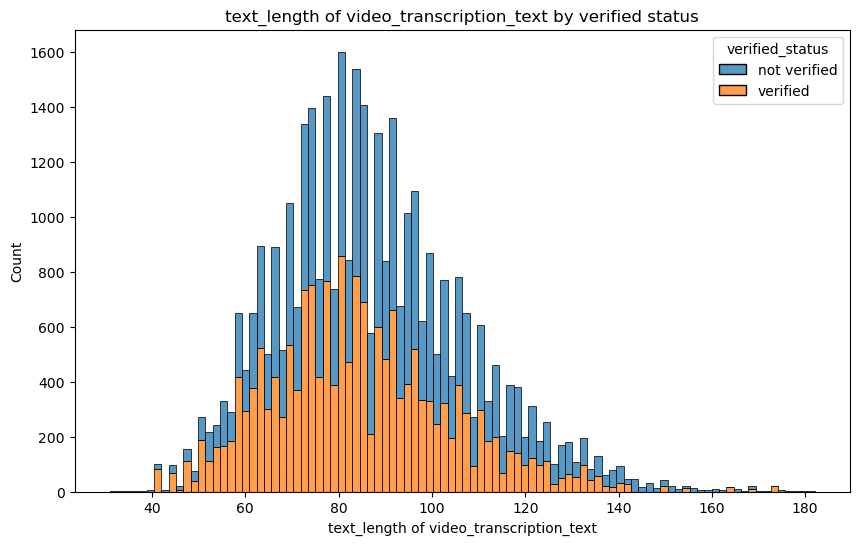

In [29]:
# Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts
# Create two histograms in one plot
plt.figure(figsize=(10,6))

histogram = sns.histplot(df_upsampled, x='text_length', hue='verified_status',  multiple='stack', element='bars')
plt.xlabel('text_length of video_transcription_text')
plt.title("text_length of video_transcription_text by verified status");
plt.show()

### **Task 2b. Examine correlations**

Next, code a correlation matrix to help determine most correlated variables.

In [31]:
# Code a correlation matrix to help determine most correlated variables
correlation_matrix = df_upsampled.corr(numeric_only=True)
correlation_matrix


,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
video_duration_sec,1.000000,0.013892,0.004503,0.001944,0.006930,0.000893,-0.005043
video_view_count,0.013892,1.000000,0.868911,0.710466,0.691557,0.772648,0.246867
video_like_count,0.004503,0.868911,1.000000,0.789173,0.767110,0.851059,0.233601
video_share_count,0.001944,0.710466,0.789173,1.000000,0.709738,0.663252,0.176362
video_download_count,0.006930,0.691557,0.767110,0.709738,1.000000,0.754449,0.175287
video_comment_count,0.000893,0.772648,0.851059,0.663252,0.754449,1.000000,0.234439
text_length,-0.005043,0.246867,0.233601,0.176362,0.175287,0.234439,1.000000


Visualize a correlation heatmap of the data.

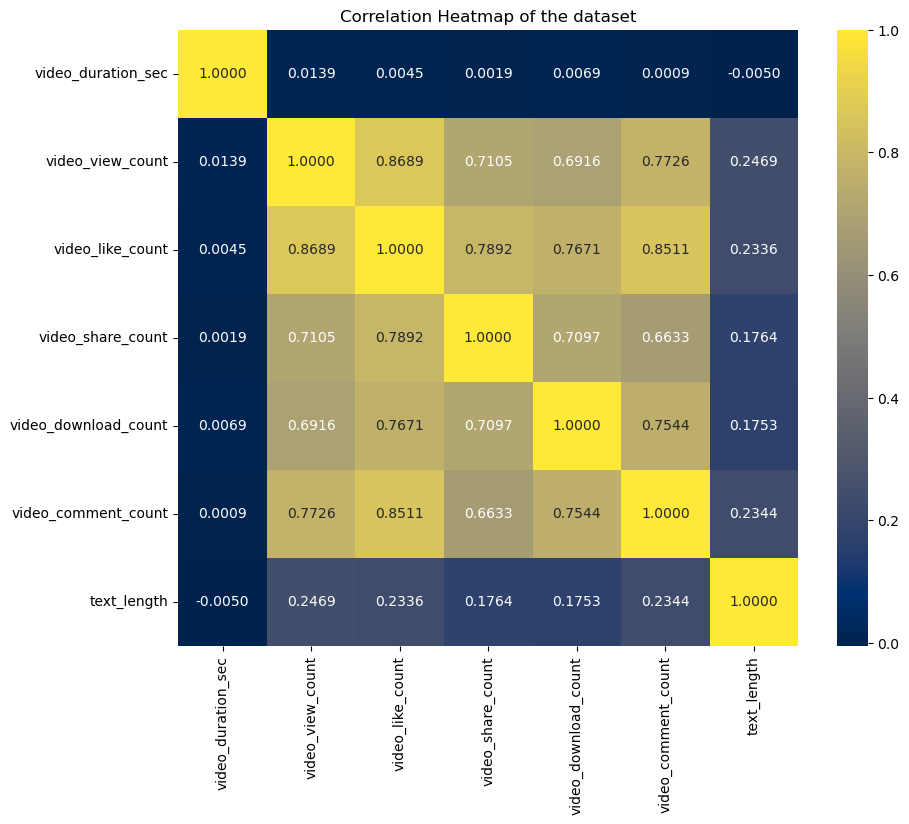

In [32]:
# Create a heatmap to visualize how correlated variables are

plt.figure(figsize=(10, 8))  
sns.heatmap(correlation_matrix, cmap="cividis", annot=True, fmt=".4f")
plt.title("Correlation Heatmap of the dataset")
plt.show()


One of the model assumptions for logistic regression is no severe multicollinearity among the features. Take this into consideration as you examine the heatmap and choose which features to proceed with.

***Question:*** What variables are shown to be correlated in the heatmap?

- The above heatmap shows that the following pair of variables are strongly correlated: `video_view_count` and `video_like_count` (0.87 correlation coefficient) and `video_comment_count` and `video_like_count` (0.85 correlation coefficient).
- 
One of the model assumptions for logistic regression is no severe multicollinearity among the features. To build a logistic regression model that meets this assumptionweou could exclude `video_like_count`. And among the variables that quantify video metrics, we could keep `video_view_count`, `video_share_count`, `video_download_count`, and `video_comment_count` as features.



<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3a. Select variables**

Set your Y and X variables.

Select the outcome variable.

In [33]:
# Select outcome variable
y = df_upsampled["verified_status"]

Select the features.

In [34]:
# Select features
X = df_upsampled.drop(['verified_status', 'video_transcription_text', 'text_length', 'video_like_count'], axis=1)

# Display first few rows of features dataframe
X.head()


,claim_status,video_duration_sec,author_ban_status,video_view_count,video_share_count,video_download_count,video_comment_count
0,claim,59,under review,343296.0,241.0,1.0,0.0
1,claim,32,active,140877.0,19034.0,1161.0,445.5
2,claim,31,active,902185.0,2858.0,833.0,329.0
3,claim,25,active,437506.0,34812.0,1234.0,445.5
4,claim,19,active,56167.0,4110.0,547.0,152.0


### **Task 3b. Train-test split**

Split the data into training and testing sets.

In [35]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)


Confirm that the dimensions of the training and testing sets are in alignment.

In [37]:
# Get shape of each training and testing set
print(f"training set:", f"X_train{X_train.shape}. y_train{y_train.shape}.")
print(f"testing set:", f"X_test{X_test.shape}. y_test{y_test.shape}.")

training set: X_train(25037, 7). y_train(25037,).
testing set: X_test(10731, 7). y_test(10731,).


### **Task 3c. Encode variables**

Check the data types of the features.

In [38]:
# Check data types
X_train.dtypes


claim_status             object
video_duration_sec        int64
author_ban_status        object
video_view_count        float64
video_share_count       float64
video_download_count    float64
video_comment_count     float64
dtype: object

In [39]:
# Get unique values in `claim_status`
X_train.claim_status.unique()


array(['opinion', 'claim'], dtype=object)

In [40]:
# Get unique values in `author_ban_status`
X_train.author_ban_status.unique()


array(['active', 'banned', 'under review'], dtype=object)

As shown above, the `claim_status` and `author_ban_status` features are each of data type `object` currently. In order to work with the implementations of models through `sklearn`, these categorical features will need to be made numeric. One way to do this is through one-hot encoding.

Encode categorical features in the training set using an appropriate method.

In [41]:
# Select the training features that needs to be encoded
extracted_X_train = X_train[['claim_status', 'author_ban_status']]

# Display first few rows
extracted_X_train.head()


,claim_status,author_ban_status
14981,opinion,active
16314,opinion,active
18140,opinion,active
93,claim,banned
11101,opinion,active


In [42]:
# Set up an encoder for one-hot encoding the categorical features
features_encoder = OneHotEncoder(drop='first', sparse_output=False)

In [43]:
# Fit and transform the training features using the encoder
encoded_data = features_encoder.fit_transform(extracted_X_train)

In [44]:
# Get feature names from encoder
feature_names = features_encoder.get_feature_names_out()
feature_names

array(['claim_status_opinion', 'author_ban_status_banned',
       'author_ban_status_under review'], dtype=object)

In [45]:
# Display first few rows of encoded training features
encoded_data[:5:]


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [46]:
# Place encoded training features (which is currently an array) into a dataframe
encoded_df = pd.DataFrame(encoded_data, columns=feature_names)

# Display first few rows
encoded_df.head()


,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,1.0,0.0,0.0


In [47]:
# Display first few rows of `X_train` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
X_train.drop(columns=['claim_status', 'author_ban_status']).head()


,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
14981,58,1235.0,114.0,2.0,1.0
16314,11,5510.0,252.0,1.0,0.0
18140,38,7496.0,542.0,19.0,5.0
93,37,436875.0,41775.0,4663.0,445.5
11101,30,955.0,3.0,0.0,0.0


In [48]:
# Concatenate `X_train` and `X_train_encoded_df` to form the final dataframe for training data (`X_train_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_train after dropping `claim_status` and `author_ban_status`,
# so that the indices align with those in `X_train_encoded_df` and `count_df`
X_train_final = pd.concat([X_train.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True), encoded_df], axis=1)

# Display first few rows
X_train_final.head()


,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,58,1235.0,114.0,2.0,1.0,1.0,0.0,0.0
1,11,5510.0,252.0,1.0,0.0,1.0,0.0,0.0
2,38,7496.0,542.0,19.0,5.0,1.0,0.0,0.0
3,37,436875.0,41775.0,4663.0,445.5,0.0,1.0,0.0
4,30,955.0,3.0,0.0,0.0,1.0,0.0,0.0


Check the data type of the outcome variable.

In [49]:
# Check data type of outcome variable
y_train.dtype


dtype('O')

In [50]:
# Get unique values of outcome variable
y_train.unique()


array(['verified', 'not verified'], dtype=object)

As shown above, the outcome variable is of data type `object` currently. One-hot encoding can be used to make this variable numeric.

Encode categorical values of the outcome variable in the training set using an appropriate method.

In [51]:
# Set up an encoder for one-hot encoding the categorical outcome variable
outcome_encoder = OneHotEncoder(drop='first', sparse_output=False)


In [52]:
# Encode the training outcome variable
# Notes:
#   - Adjusting the shape of `y_train` before passing into `.fit_transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.fit_transform()`, so that it can be used later to train the model
y_train_final = outcome_encoder.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Display the encoded training outcome variable
y_train_final


array([1., 1., 0., ..., 0., 0., 0.])

### **Task 3d. Model building**

Construct a model and fit it to the training set.

In [53]:
# Construct a logistic regression model and fit it to the training set

# Initialize and fit the Logistic Regression model
model = LogisticRegression(C=0.01, solver='liblinear', random_state=42, max_iter=200)
clf = model.fit(X_train_final, y_train_final)


<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Taks 4a. Results and evaluation**

Evaluate your model.

Encode categorical features in the testing set using an appropriate method.

In [54]:
# Select the testing features that needs to be encoded
extracted_X_test = X_test[['claim_status', 'author_ban_status']]

# Display first few rows
extracted_X_test.head()


,claim_status,author_ban_status
15439,opinion,active
1266,claim,under review
12194,opinion,under review
17408,opinion,banned
14057,opinion,banned


In [55]:
# Transform the testing features using the encoder
encoded_data = features_encoder.fit_transform(extracted_X_test)
# Get feature names from encoder
feature_names = features_encoder.get_feature_names_out()

# Display first few rows of encoded testing features
encoded_data[:5:]


array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 0.]])

In [56]:
# Place encoded testing features (which is currently an array) into a dataframe
encoded_df = pd.DataFrame(encoded_data, columns=feature_names)


# Display first few rows
encoded_df.head()


,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,1.0
3,1.0,1.0,0.0
4,1.0,1.0,0.0


In [57]:
# Display first few rows of `X_test` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
X_test.drop(columns=['claim_status', 'author_ban_status']).head()


,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
15439,14,1580.0,49.0,12.0,1.0
1266,43,862507.0,86137.0,3206.0,265.0
12194,52,449.0,20.0,0.0,0.0
17408,17,4458.0,111.0,6.0,2.0
14057,8,9877.0,65.0,5.0,1.0


In [58]:
# Concatenate `X_test` and `X_test_encoded_df` to form the final dataframe for training data (`X_test_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_test after dropping `claim_status`, and `author_ban_status`,
# so that the indices align with those in `X_test_encoded_df` and `test_count_df`
X_test_final = pd.concat([X_test.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True), encoded_df], axis=1)


# Display first few rows
X_test_final.head()


,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,14,1580.0,49.0,12.0,1.0,1.0,0.0,0.0
1,43,862507.0,86137.0,3206.0,265.0,0.0,0.0,1.0
2,52,449.0,20.0,0.0,0.0,1.0,0.0,1.0
3,17,4458.0,111.0,6.0,2.0,1.0,1.0,0.0
4,8,9877.0,65.0,5.0,1.0,1.0,1.0,0.0


Test the logistic regression model. Use the model to make predictions on the encoded testing set.

In [59]:
# Use the logistic regression model to get predictions on the encoded testing set
y_hat = clf.predict(X_test_final)


Display the predictions on the encoded testing set.

In [60]:
# Display the predictions on the encoded testing set
y_hat


array([1., 0., 1., ..., 1., 0., 0.])

Display the true labels of the testing set.

In [61]:
# Display the true labels of the testing set
y_test


15439        verified
1266     not verified
12194        verified
17408        verified
14057        verified
             ...     
17830    not verified
10409        verified
14946        verified
1626     not verified
7849     not verified
Name: verified_status, Length: 10731, dtype: object

Encode the true labels of the testing set so it can be compared to the predictions.

In [62]:
# Encode the testing outcome variable
# Notes:
#   - Adjusting the shape of `y_test` before passing into `.transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.transform()`, so that it can be used later to compare with predictions
y_test_final = outcome_encoder.transform(y_test.values.reshape(-1, 1)).ravel()

# Display the encoded testing outcome variable
y_test_final[::5]

array([1., 0., 0., ..., 1., 1., 0.])

Confirm again that the dimensions of the training and testing sets are in alignment since additional features were added.

In [63]:
# Get shape of each training and testing set
print(f"training set:", f"X_train{X_train.shape}. y_train{y_train.shape}.")
print(f"testing set:", f"X_test{X_test.shape}. y_test{y_test.shape}.")


training set: X_train(25037, 7). y_train(25037,).
testing set: X_test(10731, 7). y_test(10731,).


### **Task 4b. Visualize model results**

Create a confusion matrix to visualize the results of the logistic regression model.

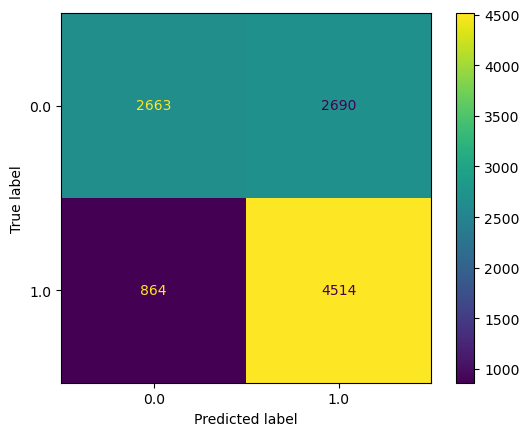

In [64]:
# Compute values for confusion matrix
cm = metrics.confusion_matrix(y_test_final, y_hat, labels = clf.classes_)

# Create display of confusion matrix
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)

# Plot confusion matrix
disp.plot()

# Display plot
plt.show()

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

In [65]:
# Print out the model's accuracy, precision, recall, and F1 score.

# calculate the model's accuracy, precision, recall, and F1 score
accuracy = metrics.accuracy_score(y_test_final, y_hat)
precision = metrics.precision_score(y_test_final, y_hat)
recall = metrics.recall_score(y_test_final, y_hat)
f1 = metrics.f1_score(y_test_final, y_hat)

# display the model's accuracy, precision, recall, and F1 score
print("Accuracy:", "{:.6f}".format(accuracy))
print("Precision:", "{:.6f}".format(precision))
print("Recall:", "{:.6f}".format(recall))
print("F1 Score:", "{:.6f}".format(f1))



Accuracy: 0.668810
Precision: 0.626596
Recall: 0.839345
F1 Score: 0.717533


In [67]:
# Create a classification report
from sklearn.metrics import classification_report

# Generate the classification report
target_labels = ["verified", "not verified"]
report = classification_report(y_test_final, y_hat, target_names=target_labels)
print(report)


              precision    recall  f1-score   support

    verified       0.76      0.50      0.60      5353
not verified       0.63      0.84      0.72      5378

    accuracy                           0.67     10731
   macro avg       0.69      0.67      0.66     10731
weighted avg       0.69      0.67      0.66     10731



### **Task 4c. Interpret model coefficients**

In [69]:
# Get the feature names from the model and the model coefficients (which represent log-odds ratios)
# Place into a DataFrame for readability
# Extract the feature names and coefficients
feature_names = clf.feature_names_in_
coefficients = clf.coef_[0]

# Create a DataFrame for readability
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print(coef_df)


                          Feature  Coefficient
0              video_duration_sec     0.004885
1                video_view_count    -0.000002
2               video_share_count     0.000006
3            video_download_count    -0.000022
4             video_comment_count    -0.001388
5            claim_status_opinion     0.000215
6        author_ban_status_banned    -0.000008
7  author_ban_status_under review    -0.000003


### **Task 4d. Conclusion**

1. What are the key takeaways from this project?

2. What results can be presented from this project?

1. Some of the key takeaways from this project:
- A lot of machine learning workflows are about cleaning, encoding, and scaling data.
- The approach we use to plot or graph our data may depend on the type of variable we are featuring and evaluating.
- A perfect model yields all true negatives and true positives, and no false negatives or false positives.
- The results of a logistic regression model can be used to express the relationship between variables.


2. Some of the results that can be presented from this project:
- The dataset has a few strongly correlated variables, which might lead to multicollinearity issues when fitting a logistic regression model. We decided to drop `video_like_count` and  from the model building because the heatmap showed that the following pair of variables were strongly correlated: video_view_count and video_like_count (0.87 correlation coefficient) and video_comment_count and video_like_count (0.85 correlation coefficient).
- Seeing the confusion matrix, we see that the model correctly predicts relatively more true positives than true negatives, false negatives, and false positives. When the model makes an error, it appears slightly more likely to predict a false positive than a false negative. 
- According to the classification report, the logistic regression model achieved a precision of 63%, a recall of 83.9%, and f1-score of 72%. It achieved an accuracy of 67% as well. These scores are taken from the "not verified" row of the output because it is the target class that we are most interested in predicting.
- 
Based on the estimated model coefficients from the logistic regression, the video feature of 'video_duration_sec' compared to the other video features has a relatively larger estimated coefficient in the model. Longer videos tend to be associated with higher odds of the user being verified. For example, each additional second of the video is associated with 0.005 increase in the log-odds of the user having a verified status.




**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged. 